# 02 Linear algebra rgb manipulation assignment - student

Run in opencv_mps (for mac).

But I have windows, therefore i use this time only-cpu open_cv. To get GPU-support on windows would require downloading OpenCV from github, installing NVIDIA CUDA Toolkit for neural networks, and then use for example CMake and C++ compiler to compile the source code.

In case it becomes important in future, here is settings:
WITH_CUDA=ON
WITH_CUDNN=ON
OPENCV_DNN_CUDA=ON

After the whole thing would have been compiled, it would also would require installing the built OpenCV packet into python environment manually. Therefore i will for this course initiatively keep opencv with cpy-only.

In [68]:
# common imports to all codes
import numpy as np

import cv2
import matplotlib.pyplot as plt

inColab = False

## R B G channels of a image

(225, 225, 3)
(225, 225)


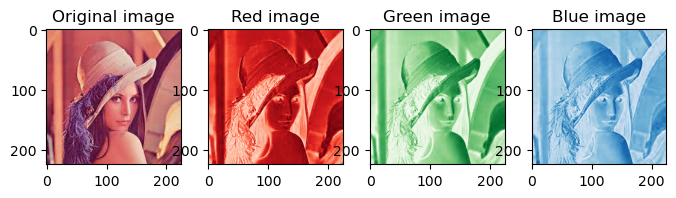

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [69]:
# TODO: read lena image and plot original image and each channels (RGB) in one row
# by using channel intensity and appropriate cmap scaling
# e.g for red channel: imshow(r_channel, cmap='Reds')
#

# read image, and because cv2 is 32 bits, it is not rgb but bgr,
# therefore, transform into rgb form
image_bgr = cv2.imread('lena.jpeg')
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#print(image_bgr[0]) #  blue color
#print(image[0]) # red color
print(image.shape)

# Split the channels
r_channel = image[:, :, 0]
g_channel = image[:, :, 1]
b_channel = image[:, :, 2]

print(r_channel.shape)

# draw 4 images: original, red, green, blue
# cmap param tells to plt how to show one channel color visibly

plt.figure(figsize=(8,2))

plt.subplot(1,4,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(1,4,2)
plt.imshow(r_channel, cmap='Reds')
plt.title("Red image")

plt.subplot(1,4,3)
plt.imshow(g_channel, cmap='Greens')
plt.title("Green image")

plt.subplot(1,4,4)
plt.imshow(b_channel, cmap='Blues')
plt.title("Blue image")
plt.show()

from matplotlib import colormaps
list(colormaps)


Shape of rgb only red and r_channel
(225, 225, 3)
(225, 225)

Compare rgb image red and c_channel
[[231 231]
 [230 230]
 [230 229]
 [229 228]
 [227 227]]
[[231 231]
 [230 230]
 [230 229]
 [229 228]
 [227 227]]


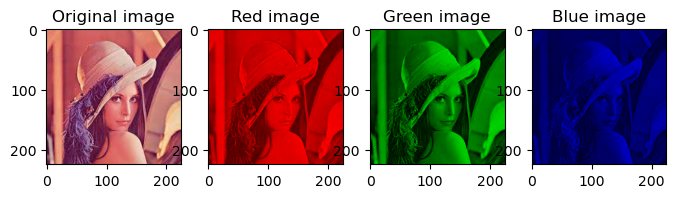

In [70]:
# TODO: read lena image and plot original image and each channels (RGB) in one row
# by using RGB image with other channel values set to zero

# start by using alrdy read "image", but make 3 versions out of it
rgb_image_only_red = image.copy()
rgb_image_only_green = image.copy()
rgb_image_only_blue = image.copy()

print("Shape of rgb only red and r_channel")
print(rgb_image_only_red.shape)
print(r_channel.shape)
print()
print("Compare rgb image red and c_channel")
print(rgb_image_only_red[0:5,0:2,0])
print(r_channel[0:5,0:2])

# use info from above prints to modify rgb_image_only_red so green and blue are 0's
rgb_image_only_red[:,:,1] = 0
rgb_image_only_red[:,:,2] = 0

# modify green to have only green, others 0's
rgb_image_only_green[:,:,0] = 0
rgb_image_only_green[:,:,2] = 0

# modify blue to have only blue, others 0's
rgb_image_only_blue[:,:,0] = 0
rgb_image_only_blue[:,:,1] = 0

plt.figure(figsize=(8,2))

plt.subplot(1,4,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(1,4,2)
plt.imshow(rgb_image_only_red)
plt.title("Red image")

plt.subplot(1,4,3)
plt.imshow(rgb_image_only_green)
plt.title("Green image")

plt.subplot(1,4,4)
plt.imshow(rgb_image_only_blue)
plt.title("Blue image")
plt.show()



### Scaling of the r channel

[[231 231]
 [230 230]
 [230 229]
 [229 228]
 [227 227]]
[[231 231]
 [230 230]
 [230 229]
 [229 228]
 [227 227]]
[[231 231]
 [230 230]
 [230 229]
 [229 228]
 [227 227]]
<class 'numpy.float32'>
[[462. 462. 460. ... 434. 470. 438.]
 [460. 460. 460. ... 470. 500. 440.]
 [460. 458. 458. ... 408. 402. 306.]
 ...
 [450. 450. 450. ... 192. 168. 190.]
 [450. 452. 452. ... 186. 196. 176.]
 [452. 452. 452. ... 178. 184. 202.]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 192. 168. 190.]
 [255. 255. 255. ... 186. 196. 176.]
 [255. 255. 255. ... 178. 184. 202.]]
[[115 115]
 [115 115]
 [115 114]
 [114 114]
 [113 113]]
[[255 255]
 [255 255]
 [255 255]
 [255 255]
 [255 255]]


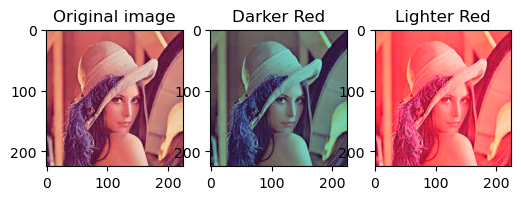

In [75]:
# TODO: read lena image and scale the red channel more darker 
# (clear the green and blue channel for more visible effects)
# (e.g. using coff 0.5) and and more lighter (e.g. using coff 2)
# Plot the results 

image_darker_red = image.copy()
image_lighter_red = image.copy()
print(image_darker_red[0:5,0:2,0])
print(image_lighter_red[0:5,0:2,0])
print(r_channel[0:5,0:2])

# keep darker image red as uint8, values never go below 0 or above 255
# use float32 for lighter red, so if value goes above 255, it won't reset
image_darker_red[:, :, 0] = (image_darker_red[:, :, 0] * 0.5).astype(np.uint8)

lighter_red = image_lighter_red[:, :, 0].astype(np.float32)
print(type(lighter_red[0,0]))
lighter_red = lighter_red * 2
print(lighter_red[0:10, :])
lighter_red = np.minimum(255, lighter_red)
print(lighter_red[0:10, :])

image_lighter_red[:, :, 0] = lighter_red


print(image_darker_red[0:5,0:2,0])
print(image_lighter_red[0:5,0:2,0])


# plot results
plt.figure(figsize=(6,2))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(image_darker_red)
plt.title("Darker Red")

plt.subplot(1,3,3)
plt.imshow(image_lighter_red)
plt.title("Lighter Red")

plt.show()





## Trivial transformations

Trivial transformations include:
- Cropping (trivial – hope so ;-) )
- Mirror
- Flip
- Negative
- Add noise


225
<class 'numpy.uint8'>
[[160 160]
 [159 159]
 [159 158]
 [158 157]
 [157 157]
 [156 156]
 [156 155]
 [155 155]
 [155 156]
 [155 155]]


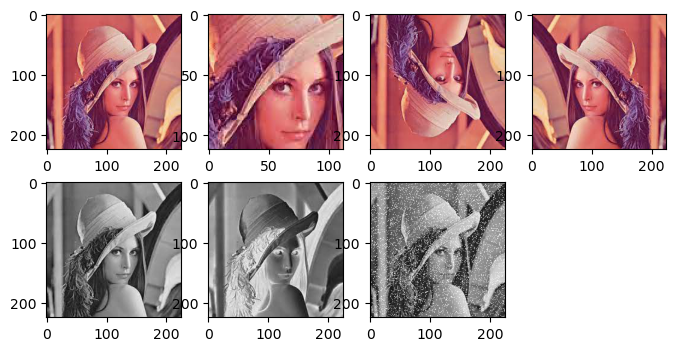

In [130]:
# TODO:  read lena image and 
# - 1. crop the image to half from the center of the image 
# - 2. mirror the image (=vertical flip)
# - 3. flip the image horizontally
# - 4. convert the image to graysacle using std luminance weights
#      (coffs for red 0.299 green 0.587 and blue 0.114)
# - 5. convert the grayscale image to negative
# - 6. add 10% of white noise to the grayscale image
# - 7. plot original an all transformations in image grid (2x4)
# Note! here we have just 7 images, so the last grid items is empty
# Note! Use only matrix operations for transforms (=not cv2 libs operations)

# vihje: 1. kohdassa ajatus on periaatteessa sama asia kuin crop
# eli otetaan 50% keskeltä kuvaa

# vihje: plotatkaa kuvat 2 riville, toka rivin vika kuva on tyhjä

# vihje: tee matriisioperaatioina eikä käytä valmista cv2 muuhun kuin imagen lukemiseen

image1 = image.copy()
image2 = image.copy()
image3 = image.copy()
image4 = image.copy()


# remember shape is x,y,z aka 
# and the image is symmetrical, therefore we need just side
side = image.shape[0]
print(side)

# crop middle
image1 = image1[side//4:side//4*3, side//4:side//4*3, :]

# vertical flip (uppest row is lowest and opposite)
# so, we use the numpy syntax similar to python's "for loop"
# [start : stop : step]
# -> start from 225-1 = 224, stop nowhere, step is negative direction
# notice we do not have ',', so it is only rows
image2 = image2[side-1::-1]

# horizontal flip (rightest column is leftest column and opposite)
# [rows, columns] -> [rows, start : stop : step] -> just go from right to left with columns
image3 = image3[:, ::-1]

# make image grey using standard luminance formula, that is based on how human eyes sense colors
red = image4[:, :, 0] * 0.299
green = image4[:, :, 1] * 0.587
blue = image4[:, :, 2] * 0.114

grey = (red + green + blue).astype(np.uint8)
print(type(grey[0,0]))
print(grey[0:10, 0:2])

# make grey into negative by reversing values
# negative is where black becomes white, and white becomes black
negative = 255 - grey[:,:]

# 10% white noise. Ill do ultra simple method:
# go every pixel one by one, and keep count
# every time pixel is divisible by 10, make it white
# use grey matrix as base
whitenoise = grey.copy()
for h in range(side):
    for w in range(side):
        if np.random.rand() < 0.10:   # 10% todennäköisyys
            whitenoise[h, w] = 255

            


#--------------------------------------
# DRAW IMAGE
plt.figure(figsize=(8,4))
# original
plt.subplot(2,4,1)
plt.imshow(image)

# cropped
plt.subplot(2,4,2)
plt.imshow(image1)

# vertical mirror of image
plt.subplot(2,4,3)
plt.imshow(image2)

# horizontal mirror of image
plt.subplot(2,4,4)
plt.imshow(image3)

# grey using std luminence formula
plt.subplot(2,4,5)
plt.imshow(grey, cmap='grey')

# negative from grey
plt.subplot(2,4,6)
plt.imshow(negative, cmap='grey')

# whitenoise 10%
plt.subplot(2,4,7)
plt.imshow(whitenoise, cmap='grey')

plt.show()